<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/stock_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析：企業の株価推移の相関
最初にデータの分布を調べる。

その後，同一業種内での企業について株価推移の相関を求める。

### (準備)  Google Drive のマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### (準備) Plotly Express & quandl のインストール

In [2]:
!pip install plotly_express

In [3]:
!pip install quandl

## 東証における17業種区分での企業数

In [ ]:
import pandas as pd
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# TSEコードと 17業種区分のみ取り出して，業種区分でグループ化
companies = companies[['コード', '17業種区分']]
kubun = companies.groupby('17業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(kubun) #, orientation='h') # orientation='h' は horizontal を意味する
fig.show()

## (参考) 東証における33業種区分での企業数

In [ ]:
import pandas as pd
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# TSEコードと 33業種区分のみ取り出して，業種区分でグループ化
companies = companies[['コード', '33業種区分']]
kubun = companies.groupby('33業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(kubun, orientation='h') # orientation='h' は horizontal を意味する
fig.show()

## 複数の企業株価の推移を並べてみる
以下では17業種区分にて「電機・精密」に分類されるソニーと日立製作所
および「食品」に区分される伊藤園の株価の推移を調べる。

下記のコードおよび実行結果に示すように，ソニーと日立製作所の株価の動きは類似するが，伊藤園は他の２社と異なる動きをしている。

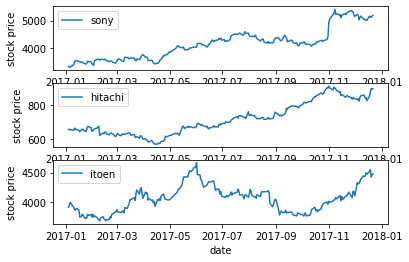

In [ ]:
import quandl

quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

# 株価の取得
# ソニー(TSE/6758)，日立製作所 (TSE/6501)，伊藤園(TSE/2593)
sony = quandl.get('TSE/6758', start_date='2017-01-01', end_date='2017-12-31')
hitachi = quandl.get('TSE/6501', start_date='2017-01-01', end_date='2017-12-31')
itoen = quandl.get('TSE/2593', start_date='2017-01-01', end_date='2017-12-31')

# 可視化 (本来，Figure を使う方が望ましいが，簡易版で勘弁して！)
import matplotlib.pyplot as plt
plt.subplot(3,1,1)
plt.plot(sony['Close'], label='sony')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.subplot(3,1,2)
plt.plot(hitachi['Close'], label='hitachi')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.subplot(3,1,3)
plt.plot(itoen['Close'], label='itoen')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.show()

## ２つの企業間の株価の(時系列)相関を調べる

In [ ]:
# ソニーと日立製作所
corr = sony['Close'].corr(hitachi['Close'])
print("ソニーと日立製作所の相関係数: {}".format(corr))

# ソニーと伊藤園
corr = sony['Close'].corr(itoen['Close'])
print("ソニーと伊藤園の相関係数: {}".format(corr))


ソニーと日立製作所の相関係数: 0.8353219741872472
ソニーと伊藤園の相関係数: 0.43117381623009904


## 同一業種における株価推移の相関
業種を絞り，その業種に含まれる企業間の株価推移の相関を調べる。

In [4]:
# 同一業種における株価推移の相関
import pandas as pd
import sys

# 企業リストの取得
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# 銀行のみに絞り込む
corps = companies[companies['17業種区分'] == '銀行']

In [5]:
corps

,コード,銘柄名,33業種コード,33業種区分,17業種コード,17業種区分
1346,7150,島根銀行,7050,銀行業,15,銀行
1347,7161,じもとホールディングス,7050,銀行業,15,銀行
1349,7167,めぶきフィナンシャルグループ,7050,銀行業,15,銀行
1350,7173,東京きらぼしフィナンシャルグループ,7050,銀行業,15,銀行
1351,7180,九州フィナンシャルグループ,7050,銀行業,15,銀行
...,...,...,...,...,...,...
1794,8562,福島銀行,7050,銀行業,15,銀行
1795,8563,大東銀行,7050,銀行業,15,銀行
1807,8600,トモニホールディングス,7050,銀行業,15,銀行
1825,8713,フィデアホールディングス,7050,銀行業,15,銀行


In [ ]:
# (参考) 組み合わせ総数の検証
from scipy.special import comb
comb(79, 2, exact=True)

3081

In [6]:
# TSE コードの組み合わせをつくる
import itertools
corps_code_combination = itertools.combinations(corps['コード'], 2)

In [ ]:
corps_code_combination

In [7]:
# (参考) 組み合わせの中身を表示
count = 0
for v in corps_code_combination:
    print(v)
    count += 1
    if count == 10: break

(7150, 7161)
(7150, 7167)
(7150, 7173)
(7150, 7180)
(7150, 7182)
(7150, 7184)
(7150, 7186)
(7150, 7189)
(7150, 8303)
(7150, 8304)


(メモ) iterative object は一度，回してしまうと空っぽになるため，改めて組み合わせを作る

In [8]:
# TSE コードの組み合わせをつくる
import itertools
corps_code_combination = itertools.combinations(corps['コード'], 2)

(注意) 以下では，予めダウンロードした株価データを参照する。
ファイルの置き場所に応じてパスを設定すること！

In [9]:
# 企業の組み合わせに応じた相関を求める
display_counter = 0
corr_collection = []
for c1, c2 in corps_code_combination:
    # 株価推移データの読み込み
    d1 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c1))
    d2 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c2))
    
    # 相関係数
    corr = d1['Close'].corr(d2['Close'])

    # 試しに値を表示
    if display_counter < 10:
      print(c1, c2, corr, file=sys.stderr)
    display_counter += 1

    # 相関係数の記録
    corr_collection.append(corr)


7150 7161 -0.227146751072591
7150 7167 -0.24480822390456
7150 7173 -0.23863151664639895
7150 7180 0.014241712263327324
7150 7182 0.004805094821107834
7150 7184 0.4226383864994078
7150 7186 0.3166307406402202
7150 7189 0.6090847642559877
7150 8303 -0.8041193898019962
7150 8304 -0.6981006205026963


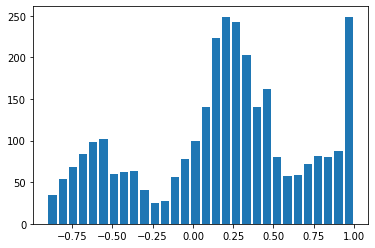

In [10]:
# 相関係数の分布の可視化
import matplotlib.pyplot as plt
plt.hist(corr_collection, bins=30, rwidth=0.8) # rwidthは棒の幅
plt.show()

### コードの全体像は以下のとおり：

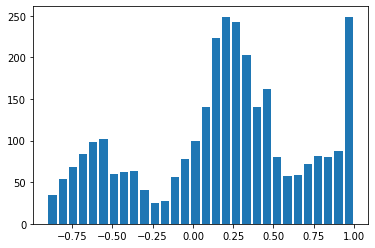

In [ ]:
# 同一業種における株価推移の相関
import pandas as pd
import sys

# 企業リストの取得
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# 銀行のみに絞り込む
corps = companies[companies['17業種区分'] == '銀行']

# TSE コードの組み合わせをつくる
import itertools
corps_code_combination = itertools.combinations(corps['コード'], 2)

# 企業の組み合わせに応じた相関を求める
corr_collection = []
for c1, c2 in corps_code_combination:
    # 株価推移データの読み込み
    d1 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c1))
    d2 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c2))
    
    # 相関係数
    corr = d1['Close'].corr(d2['Close'])
    # print(c1, c2, corr, file=sys.stderr)
    
    # 相関係数の記録
    corr_collection.append(corr)

# 相関係数の分布の可視化
import matplotlib.pyplot as plt
plt.hist(corr_collection, bins=30, rwidth=0.8) # rwidthは棒の幅
plt.show()
